# L12 QR factorization

## Example: QR factorization

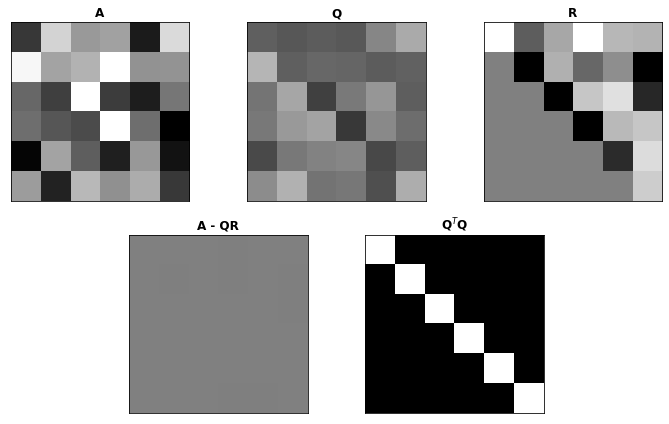

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math

# used to create non-regular subplots
import matplotlib.gridspec as gridspec

# create a random matrix
A = np.random.randn(6,6)

# QR decomposition
Q,R = np.linalg.qr(A)



# show the matrices
fig = plt.figure(figsize=(10,6))
axs = [0]*5
c = 1.5 # color limits

gs1 = gridspec.GridSpec(2,6)
axs[0] = plt.subplot(gs1[0,:2])
axs[0].imshow(A,vmin=-c,vmax=c,cmap='gray')
axs[0].set_title('A',fontweight='bold')

axs[1] = plt.subplot(gs1[0,2:4])
axs[1].imshow(Q,vmin=-c,vmax=c,cmap='gray')
axs[1].set_title('Q',fontweight='bold')

axs[2] = plt.subplot(gs1[0,4:6])
axs[2].imshow(R,vmin=-c,vmax=c,cmap='gray')
axs[2].set_title('R',fontweight='bold')

axs[3] = plt.subplot(gs1[1,1:3])
axs[3].imshow(A - Q@R,vmin=-c,vmax=c,cmap='gray')
axs[3].set_title('A - QR',fontweight='bold')

axs[4] = plt.subplot(gs1[1,3:5])
axs[4].imshow(Q.T@Q,cmap='gray')
axs[4].set_title(r'Q$^T$Q',fontweight='bold')

# remove ticks from all axes
for a in axs:
  a.set_xticks([])
  a.set_yticks([])

plt.tight_layout()
plt.savefig('Figure_QR.png',dpi=300)
plt.show()

## Example 3: QR  factorization of a matrix

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math

A = [ [1,0],
      [1,0],
      [0,1] ]

# "full" QR decomposition
Q,R = np.linalg.qr(A,'complete')
print('Q:'),print(Q), print('')
print('R:'), print(R), print('')

# "economy" QR decomposition
Qe,Re = np.linalg.qr(A) # is the default option in Python
print('Qe:'),print(Qe), print('')
print('Re:'), print(Re), print('')


Q:
[[-0.70710678  0.          0.70710678]
 [-0.70710678  0.         -0.70710678]
 [-0.         -1.          0.        ]]

R:
[[-1.41421356  0.        ]
 [ 0.         -1.        ]
 [ 0.          0.        ]]

Qe:
[[-0.70710678  0.        ]
 [-0.70710678  0.        ]
 [-0.         -1.        ]]

Re:
[[-1.41421356  0.        ]
 [ 0.         -1.        ]]



(None, None, None)

## Example 4: Implement Gram-Schmidt process and compare the result with the result of QR factorization

Q:
[[ 0.25599717  0.41284207  0.42708449 -0.76264389]
 [-0.03747572 -0.82393519 -0.1530823  -0.54432727]
 [ 0.96359932 -0.11582249 -0.18042206  0.15971654]
 [ 0.06735992 -0.37050961  0.87270414  0.31076156]]

Q2:
[[-0.25599717  0.41284207  0.42708449 -0.76264389]
 [ 0.03747572 -0.82393519 -0.1530823  -0.54432727]
 [-0.96359932 -0.11582249 -0.18042206  0.15971654]
 [-0.06735992 -0.37050961  0.87270414  0.31076156]]

R:
[[-1.70760727 -0.75922249 -0.39284339 -0.87137631]
 [ 0.          0.66446252  1.20618106 -2.00392234]
 [ 0.          0.          1.60524455 -1.07688701]
 [ 0.          0.          0.          1.79080087]]

Q-Q2:
[[ 0.51199435 -0.          0.          0.        ]
 [-0.07495145  0.         -0.          0.        ]
 [ 1.92719865  0.         -0.          0.        ]
 [ 0.13471984  0.         -0.          0.        ]]
 
Q+Q2:
[[-0.          0.82568414  0.85416899 -1.52528779]
 [ 0.         -1.64787039 -0.3061646  -1.08865454]
 [-0.         -0.23164498 -0.36084412  0.31943308]


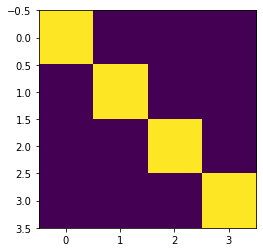

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import math
# create the matrix 
m = 4
n = 4
A = np.random.randn(m,n)

# initialize
Q = np.zeros((m,n))

# the GS algorithm
for i in range(n):
    
    # initialize
    Q[:,i] = A[:,i]
    
    # orthogonalize
    a = A[:,i] # convenience
    for j in range(i): # only to earlier cols
        q = Q[:,j] # convenience
        Q[:,i]=Q[:,i]-np.dot(a,q)/np.dot(q,q)*q
    
    # normalize
    Q[:,i] = Q[:,i] / np.linalg.norm(Q[:,i])

# "real" QR decomposition for comparison
Q2,R = np.linalg.qr(A)

print('Q:'),print(Q), print('')

print('Q2:'),print(Q2), print('')
print('R:'), print(R), print('')

# note the possible sign differences.
# seemingly non-zero columns will be 0 when adding
print('Q-Q2:'),print( np.round( Q-Q2 ,10) ), print(' ')
print('Q+Q2:'), print( np.round( Q+Q2 ,10) ), print(' ')

# one more check:
print(np.round(Q.T@Q,3))
plt.imshow(Q.T@Q)
plt.show()


## Example 5: The inverse via QR factorization

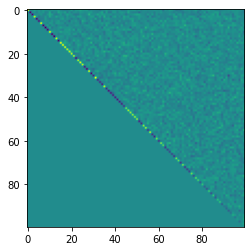

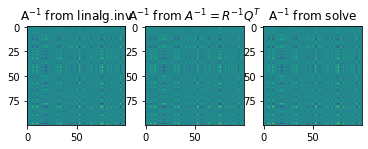

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math

# generate a large matrix and invert using QR and inv()
x=100
A=np.random.randn(x,x)
# explicit inverse
Ai=np.linalg.inv(A)
# inverse via QR
Q,R=np.linalg.qr(A)
plt.imshow(R)
plt.show()

Ai1=np.linalg.inv(R)@Q.T
# solves RA^{-1}=Q^{T} to find A^{-1}
Ai2=np.linalg.solve(R,Q.T)

plt.subplot(1,3,1)
plt.imshow(Ai)
plt.title('A$^{-1}$ from linalg.inv')


plt.subplot(1,3,2)
plt.imshow(Ai1)
plt.title('A$^{-1}$ from $A^{-1}=R^{-1} Q^T$')

plt.subplot(1,3,3)
plt.imshow(Ai2)
plt.title('A$^{-1}$ from solve')

plt.show()

## Example 6: The inverse via QR factorization (one more example)

In [35]:
import numpy as np

# Define a square matrix A
A = np.array([[2, 1], [3, 4]])

# Compute QR decomposition
Q, R = np.linalg.qr(A)

# Compute A inverse using QR decomposition: A^{-1} = R^{-1} Q^T
A_inv = np.linalg.solve(R, Q.T)

# Verify by multiplying with A (should give identity matrix)
I_check = np.dot(A, A_inv)

# Print results
print("Matrix A:\n", A)
print("Orthogonal Matrix Q:\n", Q)
print("Upper Triangular Matrix R:\n", R)
print("Computed A inverse using QR:\n", A_inv)
print("A * A_inv (should be identity):\n", I_check)


Matrix A:
 [[2 1]
 [3 4]]
Orthogonal Matrix Q:
 [[-0.5547002  -0.83205029]
 [-0.83205029  0.5547002 ]]
Upper Triangular Matrix R:
 [[-3.60555128 -3.88290137]
 [ 0.          1.38675049]]
Computed A inverse using QR:
 [[ 0.8 -0.2]
 [-0.6  0.4]]
A * A_inv (should be identity):
 [[ 1.00000000e+00  5.55111512e-17]
 [-4.44089210e-16  1.00000000e+00]]


## Example 7: use QR decomposition to compute det(A)

In [42]:
import numpy as np

# Define the matrix A
A = np.array([[8,2.6,4.0,9.8],
              [4.2,6.3,-1.2,5.0],
              [-2.0,0.0,9.1,8.5],
              [18.7,25.0,-1.0,23.5]])

# Perform QR decomposition
Q, R = np.linalg.qr(A)

print(np.round(Q,2)), print(' ')
print(np.round(R,2))

# Compute the determinant from QR decomposition (det(A) = product of diagonal elements of R)
det_from_qr = np.prod(np.diagonal(R))

# Display the results
print(f"Determinant from QR decomposition: {np.abs(det_from_qr)}")



[[-0.38  0.87 -0.31 -0.1 ]
 [-0.2  -0.17  0.09 -0.96]
 [ 0.1  -0.3  -0.95 -0.06]
 [-0.9  -0.36  0.01  0.25]]
 
[[-20.86 -24.67   0.48 -25.01]
 [  0.    -7.92   1.31  -3.46]
 [  0.     0.    -9.96 -10.39]
 [  0.     0.     0.    -0.32]]
Determinant from QR decomposition: 519.823799999999


## Example 8: using QR decomposition to compute matrix's determinant

In [43]:
import numpy as np

# Define the matrix A
A = np.array([[1, 9, 0, 5, 3, 2],
              [-6, 3, 8, 2, -8, 0],
              [3, 15, 23, 2, 1, 7],
              [3, 57, 35, 1, 7, 9],
              [3, 5, 6, 15, 55, 2],
              [33, 7, 5, 3, 5, 7]])

# Perform QR decomposition
Q, R = np.linalg.qr(A)

print(np.round(Q,2)), print(' ')
print(np.round(R,2))

# Compute the determinant from QR decomposition (det(A) = product of diagonal elements of R)
det_from_qr = np.prod(np.diagonal(R))

# Compute the determinant using the built-in np.linalg.det() function
det_from_np = np.linalg.det(A)

# Display the results
print(f"Determinant from QR decomposition: {np.abs(det_from_qr)}")
print(f"Determinant from np.linalg.det: {np.abs(det_from_np)}")

# Check if both methods give the same result
if np.isclose(np.abs(det_from_qr), np.abs(det_from_np)):
    print("Both methods give the same determinant.")
else:
    print("The methods yield different results.")


[[-0.03 -0.15  0.37  0.36  0.69 -0.48]
 [ 0.18 -0.09 -0.38  0.09  0.61  0.66]
 [-0.09 -0.23 -0.81 -0.09  0.07 -0.52]
 [-0.09 -0.95  0.19 -0.11 -0.15  0.15]
 [-0.09 -0.06 -0.17  0.92 -0.34  0.1 ]
 [-0.97  0.1  -0.01 -0.06  0.13  0.16]]
 
[[-33.96 -13.34  -9.1   -4.3  -11.93  -8.45]
 [  0.   -58.82 -39.23  -3.    -9.65  -9.9 ]
 [  0.     0.   -16.04  -2.81  -4.47  -3.6 ]
 [  0.     0.     0.    15.25  49.51   0.51]
 [  0.     0.     0.     0.   -21.58   0.78]
 [  0.     0.     0.     0.     0.    -1.93]]
Determinant from QR decomposition: 20377807.99999999
Determinant from np.linalg.det: 20377807.999999978
Both methods give the same determinant.
